# Multi-linear regression of Kaggle's auto-mpg dataset

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [165]:
df = pd.read_csv('/content/drive/MyDrive/GitHub/car-mpg/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [166]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [167]:
# dropping car name column since no impact on mpg
df = df.drop(['car name'], axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [168]:
# check missing values
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [169]:
# origin: 1 for America, 2 for Europe, 3 for Japan
df['origin'] = df['origin'].replace({1:'US', 2:'Europe', 3:'Japan'})
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,US
1,15.0,8,350.0,165,3693,11.5,70,US
2,18.0,8,318.0,150,3436,11.0,70,US
3,16.0,8,304.0,150,3433,12.0,70,US
4,17.0,8,302.0,140,3449,10.5,70,US


In [170]:
# convert origin to dummies
df = pd.get_dummies(df, columns=['origin'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Europe,origin_Japan,origin_US
0,18.0,8,307.0,130,3504,12.0,70,0,0,1
1,15.0,8,350.0,165,3693,11.5,70,0,0,1
2,18.0,8,318.0,150,3436,11.0,70,0,0,1
3,16.0,8,304.0,150,3433,12.0,70,0,0,1
4,17.0,8,302.0,140,3449,10.5,70,0,0,1


In [171]:
df.dtypes # horsepower type is string (obj), not int

mpg              float64
cylinders          int64
displacement     float64
horsepower        object
weight             int64
acceleration     float64
model year         int64
origin_Europe      uint8
origin_Japan       uint8
origin_US          uint8
dtype: object

In [172]:
# checking horsepower for any non-digit values
tmp = df['horsepower'].str.isdigit()
df[tmp == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Europe,origin_Japan,origin_US
32,25.0,4,98.0,?,2046,19.0,71,0,0,1
126,21.0,6,200.0,?,2875,17.0,74,0,0,1
330,40.9,4,85.0,?,1835,17.3,80,1,0,0
336,23.6,4,140.0,?,2905,14.3,80,0,0,1
354,34.5,4,100.0,?,2320,15.8,81,1,0,0
374,23.0,4,151.0,?,3035,20.5,82,0,0,1


In [173]:
# Instead of dropping the non-digit row, replace it with nan first, then some values b/c cannot replace string with float
df.replace(to_replace='?', value=np.nan, inplace=True)
df[tmp==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Europe,origin_Japan,origin_US
32,25.0,4,98.0,NaN,2046,19.0,71,0,0,1
126,21.0,6,200.0,NaN,2875,17.0,74,0,0,1
330,40.9,4,85.0,NaN,1835,17.3,80,1,0,0
336,23.6,4,140.0,NaN,2905,14.3,80,0,0,1
354,34.5,4,100.0,NaN,2320,15.8,81,1,0,0
374,23.0,4,151.0,NaN,3035,20.5,82,0,0,1


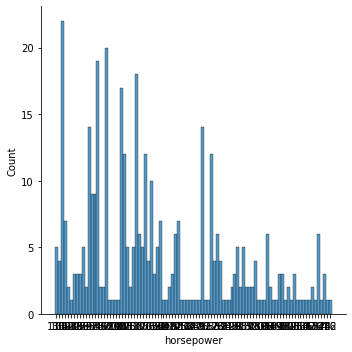

In [174]:
# check horsepower distribution
sns.displot(df['horsepower'])

In [175]:
# since it's not close to normal distribution, use median instead of mean
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
df['horsepower'] = df['horsepower'].astype('float64')
df.isna().sum()

mpg              0
cylinders        0
displacement     0
horsepower       0
weight           0
acceleration     0
model year       0
origin_Europe    0
origin_Japan     0
origin_US        0
dtype: int64

In [176]:
df.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model year         int64
origin_Europe      uint8
origin_Japan       uint8
origin_US          uint8
dtype: object

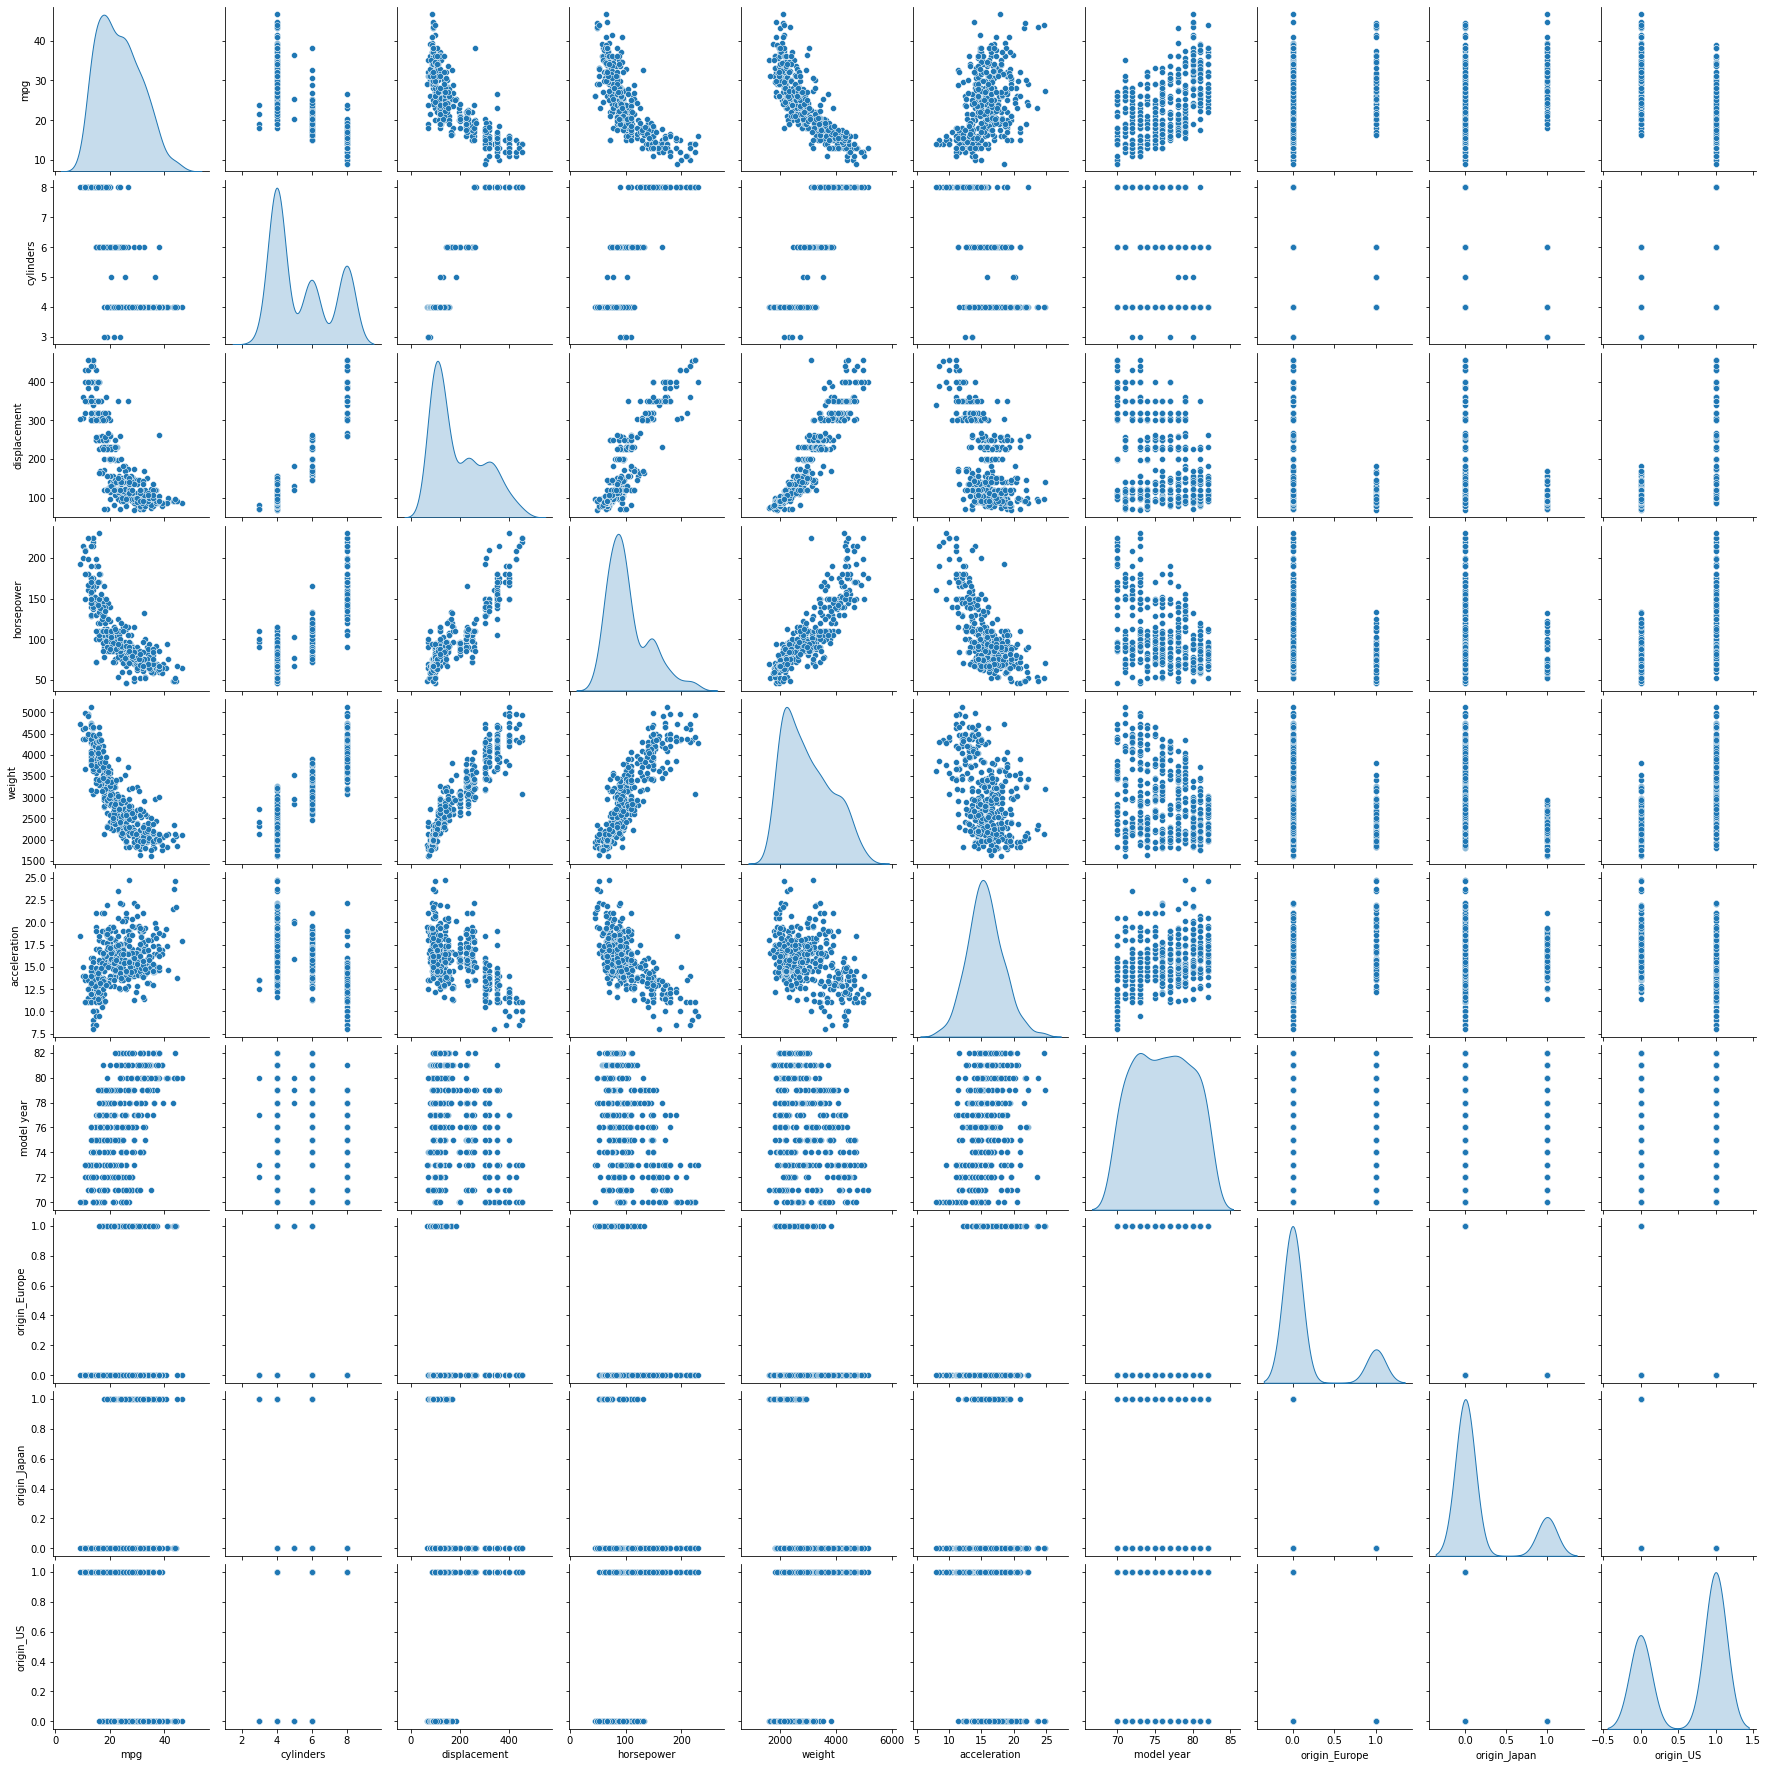

In [177]:
# correlations among columns
sns.pairplot(df, diag_kind='kde')
plt.show()

In [178]:
# split train/test data
features = df.drop(['mpg'], axis=1)
target = df[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state=10)

In [179]:
# train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [180]:
# print coefficients
for i, col in enumerate(X_train.columns):
  print(f'{col} coefficient = {model.coef_[0][i]}')
print(f'intercept = {model.intercept_[0]}')

cylinders coefficient = -0.5326103264124441
displacement coefficient = 0.0283138190811164
horsepower coefficient = -0.02031573036930847
weight coefficient = -0.007054398416199547
acceleration coefficient = 0.11106136799943743
model year coefficient = 0.7729943379829242
origin_Europe coefficient = 1.1249526800084126
origin_Japan coefficient = 0.9566427023702935
origin_US coefficient = -2.0815953823787035
intercept = -15.351268981925081


In [181]:
# print training and test scores
print(f'training score = {model.score(X_train, y_train)}')
print(f'test score = {model.score(X_test, y_test)}')

training score = 0.8222923013922977
test score = 0.8247628875326799
